In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
X,y = mnist['data'],mnist['target']
print(X.shape)

(70000, 784)


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=60000)

In [4]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=400,n_jobs=-1,max_depth=40)
rnd_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=40, n_estimators=400, n_jobs=-1)

In [5]:
from sklearn.metrics import accuracy_score
y_pred = rnd_clf.predict(X_test)
acc = accuracy_score(y_test,y_pred)
acc

0.9728

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_red_train = pca.fit_transform(X_train)

In [10]:
from sklearn.ensemble import RandomForestClassifier
rnd_red_clf = RandomForestClassifier(n_estimators=400,n_jobs=-1,max_depth=40)
rnd_red_clf.fit(X_red_train,y_train)

RandomForestClassifier(max_depth=40, n_estimators=400, n_jobs=-1)

In [9]:
X_red_train.shape

(60000, 154)

In [11]:
from sklearn.metrics import accuracy_score
y_pred = rnd_red_clf.predict(pca.transform(X_test))
acc = accuracy_score(y_test,y_pred)
acc

0.9554

In [1]:
from sklearn.manifold import TSNE
tsne = TSNE()
x_2d= tsne.fit_transform(X)

NameError: name 'X' is not defined

In [1]:
import matplotlib.pyplot as plt
plt.plot(x_2d)

NameError: name 'x_2d' is not defined

In [2]:
from sklearn.datasets import fetch_olivetti_faces
face = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/aditya/scikit_learn_data


In [4]:
X,y = face['data'],face['target']

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

split= StratifiedShuffleSplit(n_splits=1,test_size=0.20)

for train_idx,test_idx in split.split(X,y):
    X_train,X_test = X[train_idx], X[test_idx]
    y_train,y_test = y[train_idx], y[test_idx]




In [9]:
X_train.shape,X_test.shape,y_test.shape

((320, 4096), (80, 4096), (80,))

In [10]:
split= StratifiedShuffleSplit(n_splits=1,test_size=0.25)
for train_idx,val_idx in split.split(X_train,y_train):
    X_train,X_val = X_train[train_idx], X_train[val_idx]
    y_train,y_val = y_train[train_idx], y_train[val_idx]

In [11]:
X_train.shape,X_val.shape,y_val.shape


((240, 4096), (80, 4096), (80,))

In [78]:
from sklearn.decomposition import PCA

pca = PCA(0.999)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

pca.n_components_

227

In [79]:
from sklearn.cluster import KMeans
k_range = range(60,140)
kmeans_for_k = []
for k in k_range:
    if(k%20==0):
        print("k=",k)
    kmeans = KMeans(n_clusters=k).fit(X_train_pca)
    kmeans_for_k.append(kmeans)
# kmeans.fit_transform(X_train)

k= 60
k= 80
k= 100
k= 120


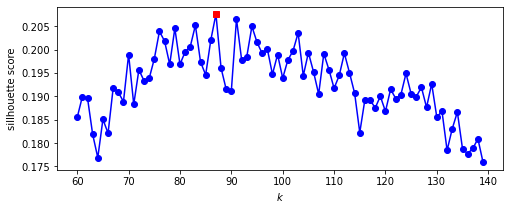

In [80]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X_train_pca,model.labels_) for model in kmeans_for_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8,3))
plt.plot(k_range,silhouette_scores,'bo-')
plt.xlabel('$k$')
plt.ylabel('sillhouette score')
plt.plot(best_k,best_score,"rs")
plt.show()

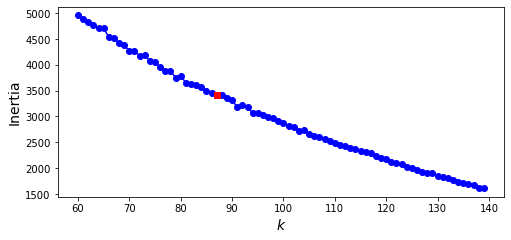

In [81]:
inertias = [model.inertia_ for model in kmeans_for_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")
plt.show()

In [82]:
import matplotlib.pyplot as plt

In [83]:
best_model = kmeans_for_k[best_index]

In [84]:
best_k

87

In [85]:
def plot_faces(X,y,n_cols):
    faces = X.reshape(-1,64,64)
    n_rows = (len(X) -1) // n_cols + 1
    plt.figure(figsize=(n_cols,n_rows*1.1))
    for index,(face,label) in enumerate(zip(faces,y)):
        plt.subplot(n_rows,n_cols,index+1)
        plt.imshow(face,cmap='gray')
        plt.axis('off')
        plt.title(label)
    plt.show()

Cluster 4


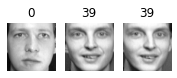

Cluster 5


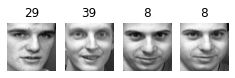

Cluster 10


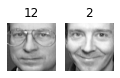

Cluster 19


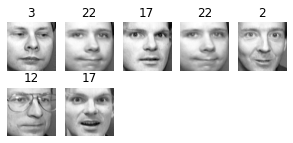

Cluster 22


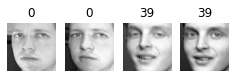

Cluster 23


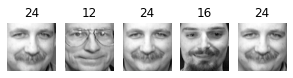

Cluster 30


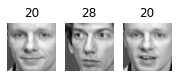

Cluster 39


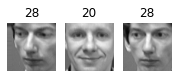

Cluster 44


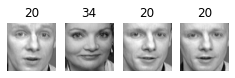

Cluster 48


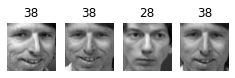

Cluster 51


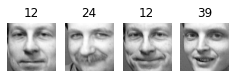

Cluster 52


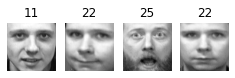

Cluster 55


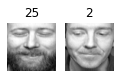

Cluster 56


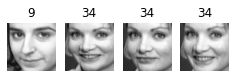

Cluster 70


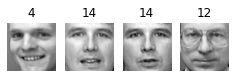

Cluster 71


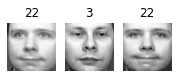

Cluster 73


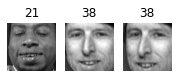

Cluster 79


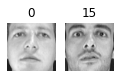

In [86]:
import numpy as np
for cluster in np.unique(best_model.labels_):
    in_cluster = best_model.labels_ == cluster
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    if len(np.unique(labels)) != 1 :
        print('Cluster',cluster)
        plot_faces(faces,labels,n_cols=5)

In [87]:
from sklearn.svm import SVC 
svc = SVC()
svc.fit(X_train_pca,y_train)

SVC()

In [88]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_val,svc.predict(X_val_pca))
acc

0.925

In [89]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('Kmeans',KMeans(n_clusters=105)),
    ('svm',SVC())
])
pipe.fit(X_train_pca,y_train)

Pipeline(steps=[('Kmeans', KMeans(n_clusters=105)), ('svm', SVC())])

In [91]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,pipe.predict(X_test_pca))
acc

0.625

In [92]:
from sklearn.mixture import GaussianMixture

comp_range = range(1,40,1)
mix_for_c = []
for c in comp_range:
    if(c%20==0):
        print("c=",c)
    mix = GaussianMixture(n_components=c,n_init=10).fit(X_train_pca,y_train)
    mix_for_c.append(mix)
# kmeans.fit_transform(X_train)

c= 20


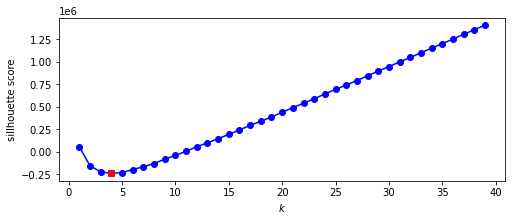

In [96]:

bic_scores = [model.aic(X_train_pca) for model in mix_for_c]
best_index = np.argmin(bic_scores)
best_c = comp_range[best_index]
best_score = bic_scores[best_index]

plt.figure(figsize=(8,3))
plt.plot(comp_range,bic_scores,'bo-')
plt.xlabel('$k$')
plt.ylabel('sillhouette score')
plt.plot(best_c,best_score,"rs")
plt.show()

In [97]:
best_c
best_model = mix_for_c[best_index]


In [98]:
X_new,y_new = best_model.sample(4)

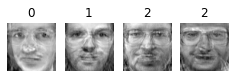

In [99]:
X_inv = pca.inverse_transform(X_new)
plot_faces(X_inv,y_new,n_cols=5)

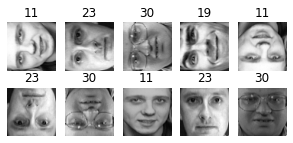

In [109]:
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.5
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad,n_cols=5)

In [110]:
X_bad_faces_pca = pca.transform(X_bad_faces)

In [111]:
best_model.score_samples(X_bad_faces_pca)

array([-15267862.36335925, -20710635.35402752, -10547445.19460668,
       -19082678.11873386, -18710897.9739407 , -13438683.16744609,
       -17754384.8972286 , -11987563.11258927,  -8827548.41041852,
       -18419107.90500999])

In [105]:
best_model.score_samples(X_train_pca[:10])

array([ 821.53813698,  948.54368281, 1031.93216982,  821.53813976,
        999.22655738, 1031.93216434,  821.53809023,  999.22649555,
       1031.93215755,  999.22648845])

In [115]:
def reconstruction_error(pca_sample,X_sample):
    X_pca = pca_sample.transform(X_sample)
    X_inv = pca_sample.inverse_transform(X_pca)
    mse = np.square(X_sample - X_inv).mean(axis=-1)
    return mse

In [117]:
reconstruction_error(pca,X_train).mean()

1.906579e-05

In [119]:
reconstruction_error(pca,X_bad_faces).mean()

0.0054950905

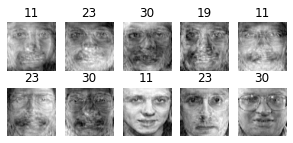

In [120]:
plot_faces(pca.inverse_transform(X_bad_faces_pca),y_bad,5)